## Dominant Color Extraction for Image Segmentation
- **Image Segmentation**
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

<img src="example.png" alt="Pizza-1" style="width: 800px;"/>



Fig : Bishop, Pattern Recognition and ML

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [25]:
img = cv2.imread('elephant.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

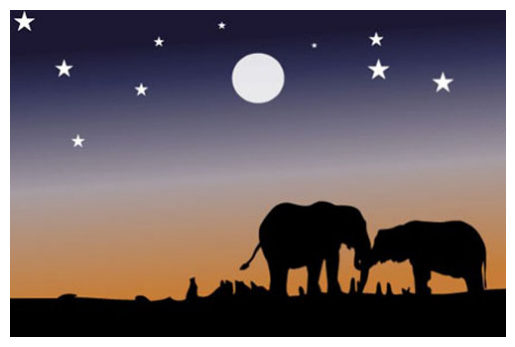

In [26]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [27]:
img.shape

(330, 500, 3)

In [28]:
# Flatten Each channel of the Image
all_pixels  = img.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


In [29]:
from sklearn.cluster import KMeans

In [40]:
dominant_colors = 5

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)


KMeans(n_clusters=5)

In [41]:
centers = km.cluster_centers_

In [42]:
centers

array([[ 38.24631026,  35.54194096,  64.75233595],
       [166.40896331, 151.7612657 , 152.52036444],
       [ 98.29898708,  94.87107929, 118.50104785],
       [  1.49862458,   0.83828001,   1.15595772],
       [188.32929988, 133.20218231,  85.71808262]])

In [43]:
centers = np.array(centers,dtype='uint8')

In [44]:
print(centers)

[[ 38  35  64]
 [166 151 152]
 [ 98  94 118]
 [  1   0   1]
 [188 133  85]]


### Plot what all colors are these ?

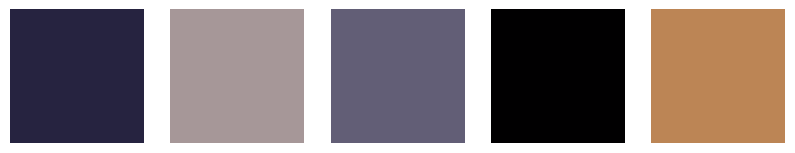

In [45]:
plt.figure(figsize=(centers.shape[0]*2,2))

i = 1

for center in centers:
    plt.subplot(1,centers.shape[0],i)
    i += 1
    na = np.zeros(shape=(100,100,3),dtype='uint8')
    na[:,:,:] = center
    plt.axis('off')
    plt.imshow(na)

plt.show()

## Segmenting Our Original Image

In [46]:
new_img = np.zeros((330*500,3),dtype='uint8')

print(new_img.shape)


(165000, 3)


In [47]:
centers

array([[ 38,  35,  64],
       [166, 151, 152],
       [ 98,  94, 118],
       [  1,   0,   1],
       [188, 133,  85]], dtype=uint8)

In [48]:
km.labels_

array([0, 0, 0, ..., 3, 3, 3])

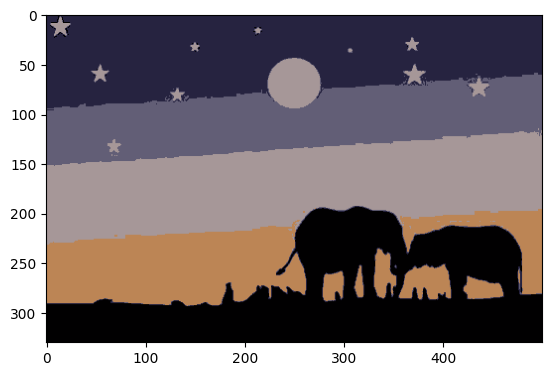

In [49]:

for ix in range(new_img.shape[0]):
    new_img[ix] = centers[km.labels_[ix]]
    
new_img = new_img.reshape((img.shape))
plt.imshow(new_img)
plt.show()
    
    
